# Task: Image processing



## Task Description
Q) Apply a histogram to each image color channel, then increase the contrast , and after that reduce the brightness in all channels in any image from your chouse and then apply the histogram of the modifications


In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

### helper functions


In [8]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

In [9]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

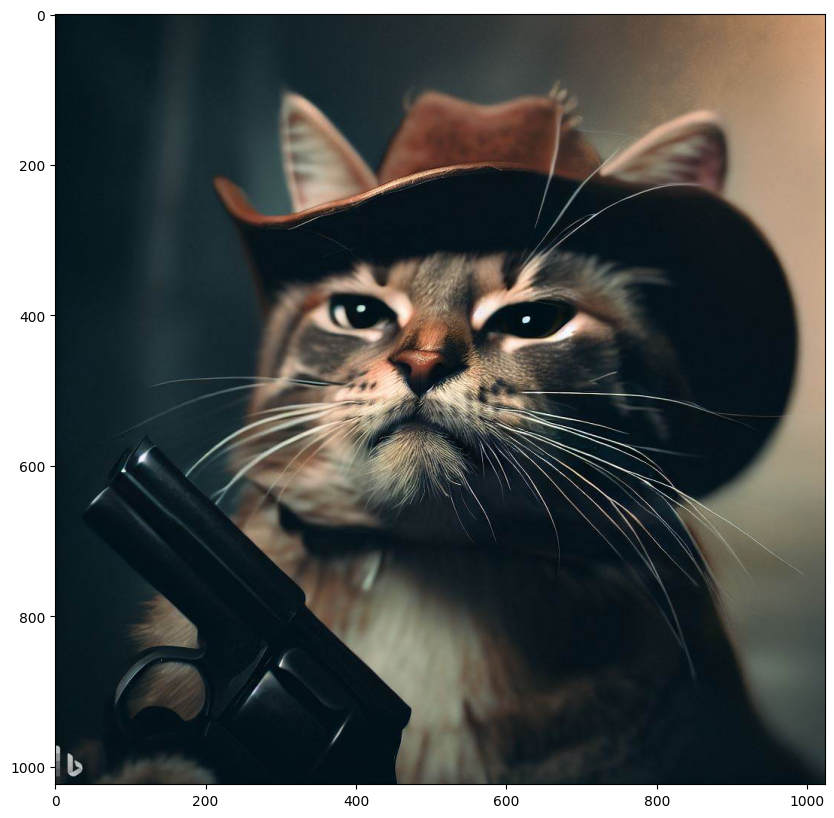

In [10]:
old_image = cv2.imread("OIG.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(old_image,cv2.COLOR_BGR2RGB))
plt.show()

### Calculating Histogram for the original image

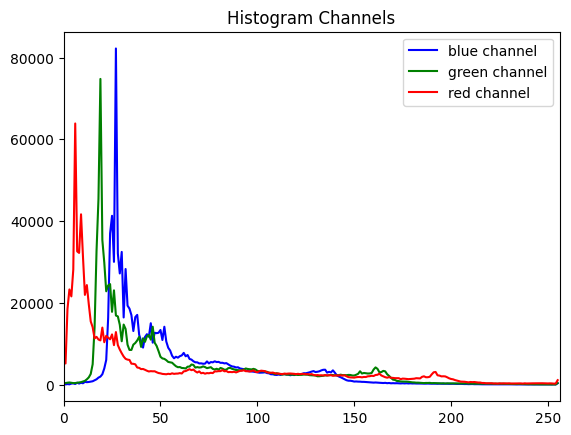

In [12]:
color = ('blue','green','red')
intensity_values=np.array([x for x in range(256)])

for i,col in enumerate(color):
    histr = cv2.calcHist([old_image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

### Brightness and contrast adjustments
- constrast (multiplying pixel by a constant)
- Brightness (decrementing pixel by a constant)

Here we apply contrast and Brightness to each channel (red, green, blue)

In [13]:
alpha = 2 # Simple contrast control
beta = 5   # Simple brightness control   
new_image = cv2.convertScaleAbs(old_image, alpha=alpha, beta=beta)

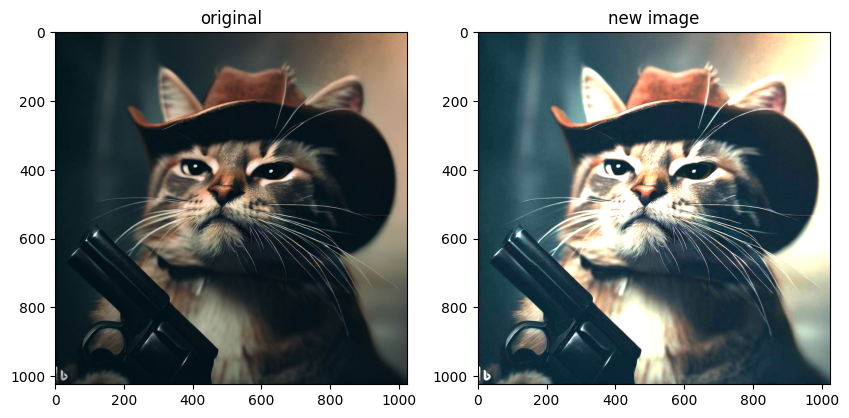

In [14]:
plot_image(old_image, new_image, "original", "new image")

#### Calculating histogram for the new image

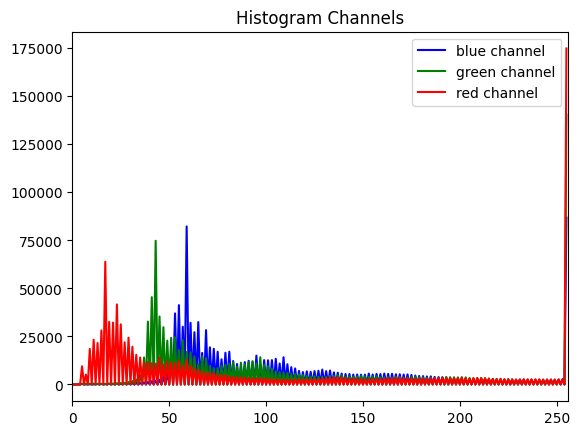

In [15]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([new_image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()